# 불균형 데이터로 회귀분석 실습해보는 노트북

- 캐글데이터 중에서 https://www.kaggle.com/mlg-ulb/creditcardfraud 데이터를 사용했음.

## 1. 데이터 불러오기 / 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

>- seaborn은 matplotlib 기반의 시각화 모듈
>- warnings은 경고메세지 출력을 무시하기 위해 import

In [2]:
tmp_data = pd.read_csv('creditcard.csv')
tmp_data.shape

(284807, 31)

>- 파일을 불러오고 shape를 확인

In [3]:
tmp_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


>- head()로 데이터의 대략적인 모양을 확인

In [4]:
tmp_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

>- 모든 column에 null이 없는 것을 확인

0    284315
1       492
Name: Class, dtype: int64

전체 중 0인 비율 : 99.82725143693798 
전체 중 1인 비율 : 0.1727485630620034


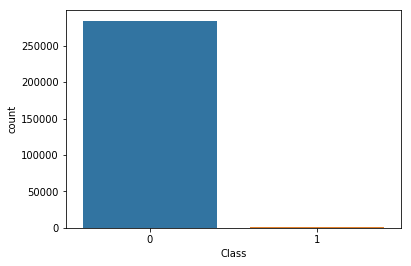

In [5]:
sns.countplot(tmp_data['Class'])
print(tmp_data['Class'].value_counts())
print('\n전체 중 0인 비율 :',tmp_data['Class'].value_counts()[0]/len(tmp_data['Class'])*100,
      '\n전체 중 1인 비율 :',tmp_data['Class'].value_counts()[1]/len(tmp_data['Class'])*100)

>- 대략 99.8 : 0.2 비율인 것을 확인할 수 있다.

In [6]:
tmp_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


>- 데이터가 매우 불균형 하므로 resampling 작업이 필요함.
>- 각 column의 분포를 회귀 분석을 적용하기에 좋은 정규 분포 형태로 스케일링이 필요함.

## 2. 스케일링

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
tmp_data2 = scaler.fit_transform(tmp_data)

>- 정규분포의 속성을 따르도록 스케일링해주는 StandardScaler를 적용

In [8]:
tmp_data2

array([[-1.99658302, -0.69424232, -0.04407492, ..., -0.06378115,
         0.24496426, -0.04159898],
       [-1.99658302,  0.60849633,  0.16117592, ...,  0.04460752,
        -0.34247454, -0.04159898],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.18102083,
         1.16068593, -0.04159898],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ..., -0.0804672 ,
        -0.0818393 , -0.04159898],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.31668678,
        -0.31324853, -0.04159898],
       [ 1.64205773, -0.27233093, -0.11489898, ...,  0.04134999,
         0.51435531, -0.04159898]])

In [9]:
tmp_data2 = pd.DataFrame(tmp_data2, columns=tmp_data.columns)

>- 스케일러를 적용해서 나온 값은 array이다.
>- pd.DataFrame으로 데이터프레임 형태로 만들고, column명은 기존 데이터의 header를 tmp_data.columns로 가져온다

In [10]:
tmp_data2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,-0.041599
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,-0.041599
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,-0.041599
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,-0.041599
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,-0.041599


In [11]:
tmp_data2['Class'] = tmp_data['Class']
## 예측해야하는 값인 Class는 본래 0, 1로 구성된 값으로 변경

>- 사기 발생과 미발생 값인 Class는 스케일링이 필요 없으니 기존 데이터의 값으로 다시 바꾸자

In [12]:
tmp_data2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


In [13]:
tmp_data2.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-1.050379e-14,-8.157366e-16,3.154853e-17,-4.409878e-15,-6.734811e-16,-2.874435e-16,4.168992e-16,-8.767997e-16,-2.423604e-16,3.078727e-16,...,1.685077e-17,1.478472e-15,-6.797197e-16,1.234659e-16,-7.659279e-16,3.247603e-16,-2.953495e-18,5.401572e-17,3.202236e-16,0.001727
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.041527
min,-1.996583e+00,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01,0.000000
25%,-8.552120e-01,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01,0.000000
50%,-2.131453e-01,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01,0.000000
75%,9.372174e-01,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02,0.000000
max,1.642058e+00,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02,1.000000


>- Class 변경이 완료됐고, 정규분포특성을 따르도록 스케일링되었다.

## 3. Resampling(SMOTE)

In [14]:
from sklearn.model_selection import train_test_split

feature_table = tmp_data2.drop('Class', axis=1)
target_table = tmp_data2['Class']

X_train, X_test, y_train, y_test = train_test_split(feature_table, target_table, test_size=0.3, random_state=123)

>- test dataset의 size를 전체의 30%로 설정하여 train과 test를 나눈다.

0    199032
1       332
Name: Class, dtype: int64

전체 중 0인 비율 : 99.83347043598644 
전체 중 1인 비율 : 0.16652956401356314


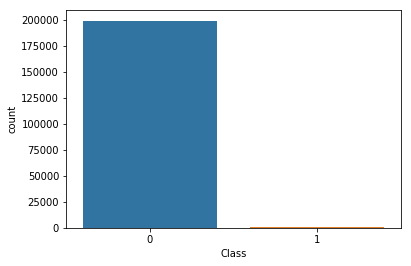

In [15]:
sns.countplot(y_train)
print(y_train.value_counts())
print('\n전체 중 0인 비율 :',y_train.value_counts()[0]/len(y_train)*100
      ,'\n전체 중 1인 비율 :',y_train.value_counts()[1]/len(y_train)*100)

>- 데이터가 매우 불균형하여 일반적인 학습으로는 Class가 0인 경우에 대한 과적합이 발생할 수 있다.
>- 대표적인 iver sampling 기법인 SMOTE를 적용해보자

In [16]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=13)
X_train_smt, y_train_smt = smt.fit_sample(X_train, y_train)

1    199032
0    199032
dtype: int64

전체 중 0인 비율 : 50.0 
전체 중 1인 비율 : 50.0


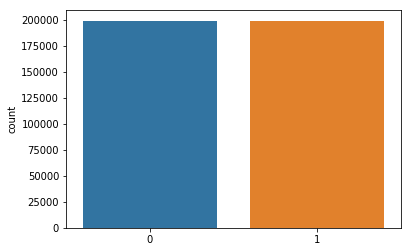

In [17]:
sns.countplot(y_train_smt)
print(pd.Index(y_train_smt).value_counts())
print('\n전체 중 0인 비율 :',pd.Index(y_train_smt).value_counts()[0]/len(y_train_smt)*100
      ,'\n전체 중 1인 비율 :',pd.Index(y_train_smt).value_counts()[1]/len(y_train_smt)*100)

>- SMOTE를 적용한 y_train_smt도 array로 나오므로 value_count()를 활용하기 위해 pd.Index()를 사용했다.
>- Class가 0인 경우만큼 데이터가 늘어난 것을 확인할 수 있다.

## 4. K-fold 교차검증

In [18]:
from sklearn.model_selection import StratifiedKFold

>- 하나의 train과 test 세트가 아닌 K-fold 교차 검증을 적용해보자

In [19]:
X_train, X_test, y_train, y_test = train_test_split(feature_table, target_table, test_size=0.2, random_state=93)
print(X_train[['V1', 'V2', 'V3']].describe(),'\n\n', X_test[['V1', 'V2', 'V3']].describe(),
          '\n--------------------------------------------------')
print('X_train의 shape은 :',X_train.shape)

                  V1             V2             V3
count  227845.000000  227845.000000  227845.000000
mean        0.000435       0.001075      -0.000296
std         0.998844       0.994200       1.003493
min       -20.661816     -38.360371     -31.871733
25%        -0.469785      -0.361526      -0.588900
50%         0.009332       0.040141       0.119499
75%         0.671760       0.486570       0.678187
max         1.253351      13.357750       6.187993 

                  V1            V2            V3
count  56962.000000  56962.000000  56962.000000
mean      -0.001740     -0.004301      0.001182
std        1.004627      1.022879      0.985920
min      -28.798555    -44.035292    -19.902569
25%       -0.470299     -0.366045     -0.581551
50%        0.008830      0.038226      0.115221
75%        0.671476      0.487445      0.674329
max        1.234906      9.990562      2.761948 
--------------------------------------------------
X_train의 shape은 : (227845, 30)


>- 먼저 test size가 0.2인 일반적인 split을 확인해보자

In [20]:
split_kfold = StratifiedKFold(n_splits=5, random_state=11, shuffle=False)

for train, test in split_kfold.split(feature_table, target_table):
    X_train, X_test = feature_table.iloc[train], feature_table.iloc[test]
    y_train, y_test = target_table.iloc[train], target_table.iloc[test]
    print(X_train[['V1', 'V2', 'V3']].describe(),'\n\n', X_test[['V1', 'V2', 'V3']].describe(),
          '\nX_train의 shape은 :',X_train.shape,'\n--------------------------------------------------')


                  V1             V2             V3
count  227845.000000  227845.000000  227845.000000
mean        0.029724       0.001772      -0.115220
std         1.011233       1.002283       0.981284
min       -23.921596     -38.360371     -31.871733
25%        -0.459673      -0.365029      -0.733638
50%         0.021015       0.038471      -0.041878
75%         0.865327       0.496577       0.571303
max         1.253351      13.357750       6.187993 

                  V1            V2            V3
count  56962.000000  56962.000000  56962.000000
mean      -0.118893     -0.007090      0.460874
std        0.944455      0.990802      0.939601
min      -28.798555    -44.035292    -21.741332
25%       -0.506909     -0.353220      0.138827
50%       -0.124038      0.044394      0.518437
75%        0.589874      0.441955      0.935660
max        1.000921     11.011666      2.705167 
X_train의 shape은 : (227845, 30) 
--------------------------------------------------
                  V1  

>- test size가 0.2라면 전체 데이터의 20%이다.
>- 이는 K-fold의 n_splits=5이면 전체 데이터를 5등분 하는 것이므로 X_train.shape이 동일한 값을 나타내는 것을 볼 수 있다.
>- K-fold를 사용하는 경우 for loop가 한 번 돌때마다 모델을 훈련하도록 loop 내에 모델 훈련 코드를 작성해야한다.

## 5. 하이퍼파라미터튜닝

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve, recall_score, classification_report

>- 훈련 모델의 하이퍼파라미터를 정한 규칙에따라 튜닝하여 훈련하는 것을 자동화한 모듈이다.
>- K-fold도 여기서 적용가능하니 그냥 GridSearch를 쓰자

In [22]:
parameters = {'C': np.linspace(1, 10, 10)}
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=split_kfold, verbose=5, n_jobs=4)
clf.fit(X_train_smt, y_train_smt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   23.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

>- 모델은 로지스틱 회귀이며, LogisticRegression의 하이퍼파라미터 중 'C'를 변경하여 훈련한다.
>- GridSearchCV()에서 cv=split_kfold로 설정하여, 위에서 실습한 K-fold를 적용하였다.

In [23]:
clf.best_params_

{'C': 10.0}

>- 'C'가 4.0인 경우가 가장 좋은 결과를 나타낸 것을 알 수 있다.

In [60]:
lr1 = LogisticRegression(C=4,penalty='l1', verbose=5)
lr1.fit(X_train_smt, y_train_smt)

[LibLinear]

LogisticRegression(C=4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=5, warm_start=False)

In [57]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

>- confusion matrix를 그려주는 코드

Recall metric in the train dataset: 92.89340101522842%


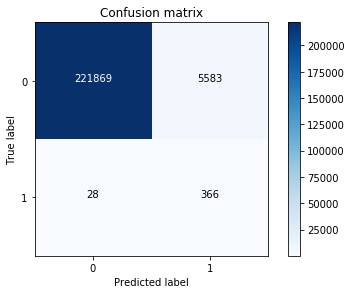

In [61]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

In [62]:
roc_auc_score(y_train, y_train_pre)

0.9521940859547451

>- 최적의 경우인 모델을 다시 훈련해서 confusion matrix를 그려봤다.

In [30]:
from sklearn.svm import LinearSVC

>- 하나만 하면 좀 그러니까 Support Vector Classification도 하자

In [31]:
parameters = {'C': np.linspace(1, 10, 10)}
lr = LinearSVC()
clf = GridSearchCV(lr, parameters, cv=split_kfold, verbose=5, n_jobs=4)
clf.fit(X_train_smt, y_train_smt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed: 19.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [32]:
clf.best_params_

{'C': 6.0}

In [63]:
lr2 = LinearSVC(C=6,penalty='l1', verbose=5, dual=False)
lr2.fit(X_train_smt, y_train_smt)

[LibLinear]

LinearSVC(C=6, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=5)

Recall metric in the train dataset: 92.13197969543147%


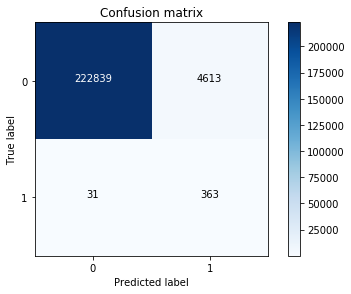

In [64]:
y_train_pre = lr2.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

In [65]:
roc_auc_score(y_train, y_train_pre)

0.9505192973833002

## 6. ensemble 사용

In [41]:
from brew.base import Ensemble
from brew.base import EnsembleClassifier
from brew.combination.combiner import Combiner

>- 모델을 두개나 만들었는데 앙상블을 안해볼 수 없지

In [66]:
lrs = [lr1, lr2]
ens = Ensemble(classifiers=lrs)
comb = Combiner(rule='majority_vote')
ensemble_lr = EnsembleClassifier(ensemble=ens, combiner=comb)

Recall metric in the train dataset: 91.87817258883248%


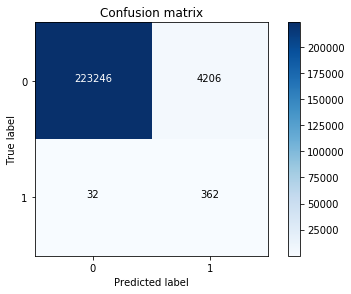

In [67]:
y_train_pre = ensemble_lr.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

>- TP값이 커진 것을 확인할 수 있다.
>- f1 스코어는 떨어져서 좋다고 할 수는 없다.